In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

870


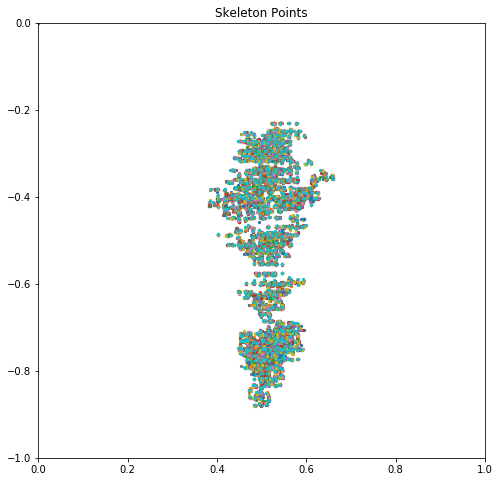

In [2]:
BASE_DIR = "D:\openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\DatasetPosePerDancer\Sus-sous"

#run through each dancer folder and plot the coordinates
count = 0
def plotCoordinates():
    fig, ax = plt.subplots(1, figsize=(8,8))
    plt.title('Skeleton Points')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global count
    for subdir, dirs, files in os.walk(BASE_DIR):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(BASE_DIR,subdir,file)
                #print(file_path)
                raw_img_json = pd.read_json(file_path)
                img_keypoints_list = raw_img_json.people[0]['pose_keypoints_2d']
                x = img_keypoints_list[0::3]
                posY = img_keypoints_list[1::3]
                y = [-y for y in posY]
                sc = ax.scatter(x,y, s=5)
                count+=1
plotCoordinates()
print(count)

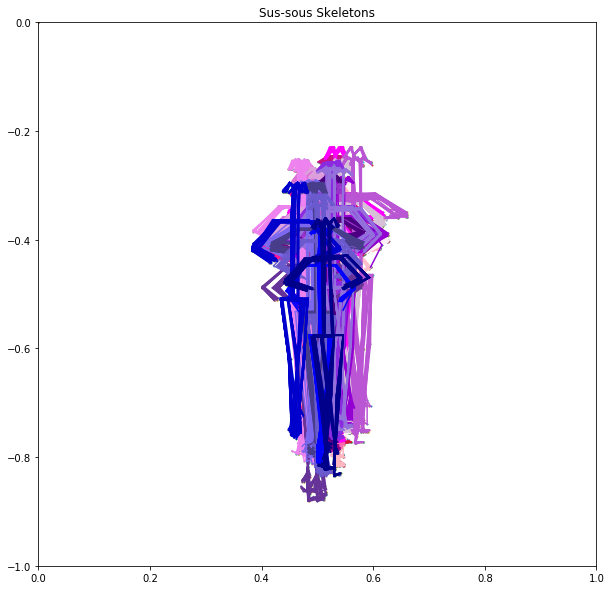

In [4]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']
allXList =[]
allYList = []
dancerNum = 0
def plotSkeletons():
    fig,ax = plt.subplots(1,figsize = (10,10))
    plt.title('Sus-sous Skeletons')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global dancerNum
    for subdir, dirs, files in os.walk(BASE_DIR):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(BASE_DIR,subdir,file)
                raw_img_json = pd.read_json(file_path)
                img_keypoints_list = raw_img_json.people[0]['pose_keypoints_2d']
                x = img_keypoints_list[0::3]
                allXList.append(x)
                posY = img_keypoints_list[1::3]
                y = [-y for y in posY]
                allYList.append(y)
                sc = ax.scatter(x,y, s=1)
                for bone in bones:
                    #Remove the 0,0 xy coordinates plotting
                    if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                        #print("zero values for joint: ",x.index(x[bone[0]]))
                        #print("zero values for joint: ",x.index(x[bone[1]]))
                        continue
                    #ax.plot([x_values],[y_values])
                    ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]],penColor[dancerNum-1])
        dancerNum+=1
plotSkeletons()

In [5]:
np.save('allSussousXList.npy', allXList)
np.save('allSussousYList.npy', allYList)

In [6]:
xloaded = np.load('allSussousXList.npy')
print(xloaded)
print(len(xloaded))
yloaded = np.load('allSussousYList.npy')
print(yloaded)
print(len(yloaded))

[[0.544086 0.540003 0.507352 ... 0.533943 0.529843 0.552309]
 [0.535889 0.533861 0.501198 ... 0.533935 0.529778 0.544133]
 [0.533882 0.531912 0.501165 ... 0.535931 0.529841 0.544034]
 ...
 [0.521657 0.521643 0.493031 ... 0.531869 0.521663 0.537986]
 [0.521656 0.521637 0.493014 ... 0.531802 0.519585 0.535951]
 [0.521609 0.51964  0.492979 ... 0.531865 0.523661 0.537996]]
870
[[-0.29814  -0.379653 -0.379638 ... -0.796602 -0.788532 -0.766669]
 [-0.298099 -0.377102 -0.379702 ... -0.796631 -0.791259 -0.769485]
 [-0.298062 -0.377109 -0.379641 ... -0.796696 -0.793888 -0.769389]
 ...
 [-0.371615 -0.434296 -0.436981 ... -0.821192 -0.81847  -0.791191]
 [-0.371619 -0.434276 -0.434331 ... -0.821192 -0.818496 -0.793921]
 [-0.368914 -0.431569 -0.431583 ... -0.823889 -0.818571 -0.794034]]
870


In [7]:
# Now calculate mean skeleton:
sumXList = [sum(i) for i in zip(*allXList)]# the * indicates the use of iterables
sumYList = [sum(j) for j in zip(*allYList)]
print(sumXList)
print(sumYList)

#Get the average: sum/count
avgXList = [sx / count for sx in sumXList]
avgYList = [sy / count for sy in sumYList]
print(avgXList)
print(avgYList)

[448.9248639999995, 448.8878089999999, 420.40476200000023, 385.32125599999995, 412.0148449999996, 477.4196339999999, 512.9897209999997, 486.46492200000046, 450.76312599999966, 433.5329040000001, 445.4303029999998, 454.21074100000016, 468.0097060000005, 460.3589070000001, 452.364145, 442.6495430000001, 455.2291789999999, 434.15515300000004, 463.7776570000001, 451.5203390000001, 459.9288960000003, 450.31720100000007, 452.6121930000003, 440.2907190000006, 456.9157329999995]
[-260.66296799999986, -319.4549759999996, -319.78787400000016, -355.9256709999999, -370.68378500000046, -318.5929459999997, -352.86840500000005, -367.46782000000053, -447.107876, -447.5195419999991, -545.0214200000003, -634.3337719999994, -447.0386469999999, -546.6948250000003, -648.0779779999999, -254.05845200000007, -253.801262, -265.56334900000013, -264.8656249999999, -677.4935989999998, -675.7739210000007, -658.9163169999999, -667.3302870000002, -656.5700699999995, -643.3772899999998]
[0.5160055908045972, 0.5159629

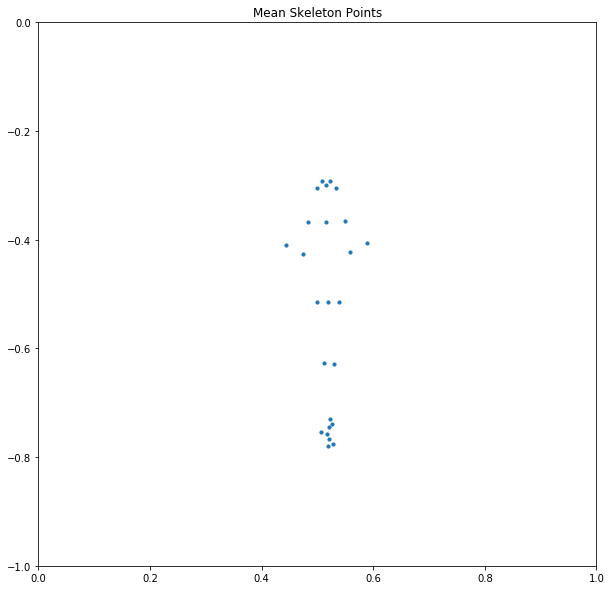

In [8]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
#Plot mean skeleton:
def plotMeanCoordinates():
    fig, ax = plt.subplots(1, figsize=(10,10))
    plt.title('Mean Skeleton Points')
    plt.xlim(0, 1)
    plt.ylim(-1, 0)
    sc = ax.scatter(avgXList,avgYList, s=10)
    #for bone in bones:
        #if avgXList[bone[0]]== 0.0 or avgYList[bone[0]] == 0.0  or avgXList[bone[1]] == 0.0 or avgYList[bone[1]] == 0.0:
            #print("zero values for joint: ",avgXList.index(avgXList[bone[0]]))
            #print("zero values for joint: ",avgXList.index(avgXList[bone[1]]))
            
        #ax.plot([avgXList[bone[0]],avgXList[bone[1]]],[avgYList[bone[0]],avgYList[bone[1]]])
plotMeanCoordinates()

In [9]:
#calculation of standard deviation values:
import statistics

In [10]:
standardDeviationX = [statistics.stdev(i) for i in zip(*allXList)]
standardDeviationY = [statistics.stdev(i) for i in zip(*allYList)]

print("Standard Deviations of X values:",standardDeviationX)
print("Standard Deviations of Y values:",standardDeviationY) 

Standard Deviations of X values: [0.024068066618986656, 0.024539308094132947, 0.02452571603437592, 0.02479127485510357, 0.023716149408017098, 0.02493761746890722, 0.026305412820542825, 0.027332579461107325, 0.02441394034293418, 0.02484022173407428, 0.025082455077162676, 0.02560783444635144, 0.024543800946710922, 0.025337601675071878, 0.025708723184393302, 0.024102646614967672, 0.02406018640396822, 0.02410015902693057, 0.02428290638677259, 0.025060578966985343, 0.025332007373469106, 0.026520026989031272, 0.023842932764844258, 0.057345878722116224, 0.026293541225404223]
Standard Deviations of Y values: [0.03622204755061461, 0.0330819362221148, 0.03323976607757493, 0.03395829800063827, 0.03645740599848234, 0.03298277711482285, 0.03384137009790437, 0.036368861113508205, 0.031135827388681824, 0.031079338056915307, 0.028907657347096077, 0.029449591426509807, 0.03133096261478931, 0.029335699622739995, 0.02996790238250862, 0.03665674935879374, 0.03683596616339337, 0.03576394138062111, 0.035859

In [11]:
print(len(standardDeviationX))
print(len(avgXList))

25
25


In [12]:
np.save('SusSousStdDevX.npy', standardDeviationX)
np.save('SusSousStdDevY.npy', standardDeviationY)
np.save('SusSousMeanX.npy', avgXList)
np.save('SusSousMeanY.npy', avgYList)